# Proyek Analisis Data: Nama dataset
- Nama: DIMAS FAJAR MUKTI
- Email: rajabiru1409@gmail.com
- Id Dicoding: JMZV1RY2JXN9

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Di musim apa penyewaan paling banyak dan paling sedikit ?
- pertanyaan 2 : apakah kondisi cuaca sangat memperngaruhi banyaknya penyewa baik dari penyewa kasual dan terdaftar

## Menyiapkan semua library yang dibuthkan

In [1]:
pip install numpy pandas scipy matplotlib seaborn jupyter pillow streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk

## Data Wrangling

### Gathering Data

#load data day#

In [3]:
day=pd.read_csv("day.csv")
day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#load data hour#

In [4]:
hour=pd.read_csv("hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#MENILAI DATA DAY#

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


keterangan :terdapat kesalahan type data pada kolom dteday,harusnya direpresentasikan sebagai tipe data datetime, bukan object

In [6]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#MENILAI DATA HOUR#

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


keterangan :terdapat kesalahan type data pada kolom dteday,harusnya direpresentasikan sebagai tipe data datetime, bukan object

In [9]:
print("Jumlah duplikasi: ",hour.duplicated().sum())
hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#membersihkan data day#

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#membersihkan data hour#

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [13]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
day.describe(include="all")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26832\4066268591.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [15]:
day_df= day.groupby(by="season").cnt.sum()
print (day.groupby(by="season").cnt.sum())

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


#keterangan :
1 = musim semi
2 = musim panas
3 = musim gugur
4 = musim dingin

In [16]:
used_data=day.groupby(by='season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})
print (used_data)

        casual  registered      cnt
season                             
1        60622      410726   471348
2       203522      715067   918589
3       226091      835038  1061129
4       129782      711831   841613


In [17]:
day.groupby(by="weathersit").cnt.sum()

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

#keterangan :

- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

 Di musim apa penyewaan paling banyak dan paling sedikit ?

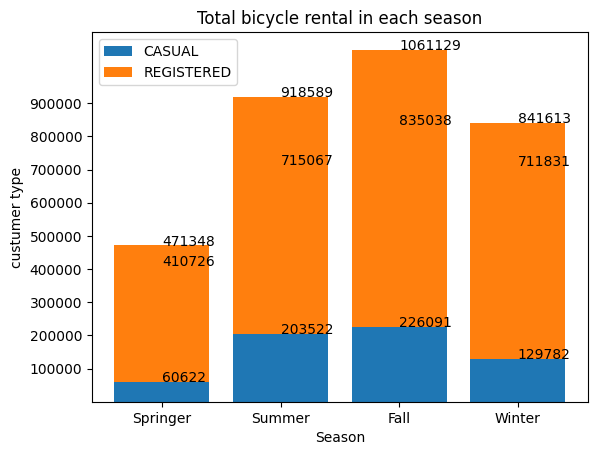

In [18]:
Season=["Springer","Summer", "Fall", "Winter"]
Casual=[60622,203522,226091,129782]
Registered=[410726,715067,835038,711831]
Totall=[471348,918589,1061129,841613]
plt.bar (Season,Casual, label="CASUAL")
plt.bar (Season,Registered, bottom =Casual, label="REGISTERED")
plt.xlabel("Season")
plt.ylabel("custumer type")
plt.title("Total bicycle rental in each season")
plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000,900000,])
for index, data in enumerate (Casual):
    plt.text (x=index, y=data+29, s=f'{data}')
for index, data in enumerate (Registered):
    plt.text (x=index, y=data+29, s=f'{data}')
for index, data in enumerate (Totall):
    plt.text (x=index, y=data+29, s=f'{data}')
plt.legend()
plt.show()

penjelasan : penyewaan tertinggi terjadi di musim gugur sebanyak 1.061.129, lalu pada musim panas sebanyak 918.589.musim dingin sebanyak 841613, dan terendah pada musim semi sebanyak 471348. Disisi lain penyewaan sudah didominasi sebagian besar oleh penyewa yang telah terdaftar daripada penyewa kasual

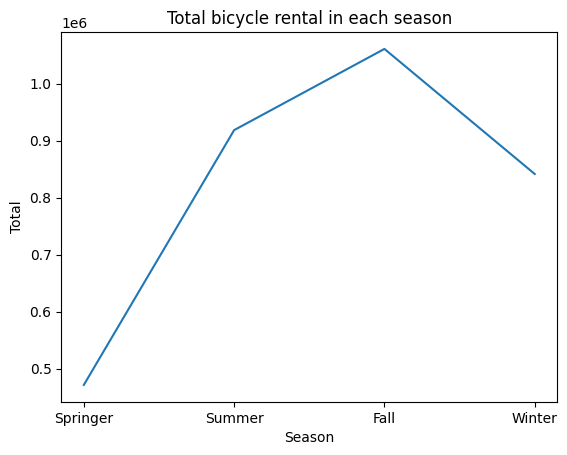

In [24]:
Season=["Springer","Summer", "Fall", "Winter"]
Totall=[471348,918589,1061129,841613]
plt.xlabel("Season")
plt.ylabel("Total")
plt.title("Total bicycle rental in each season")
plt.yticks([100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])
plt.plot (Season,Totall)
plt.show()

### Pertanyaan 2: 

Apakah kondisi cuaca sangat memperngaruhi banyaknya penyewa baik dari penyewa kasual dan terdaftar ?

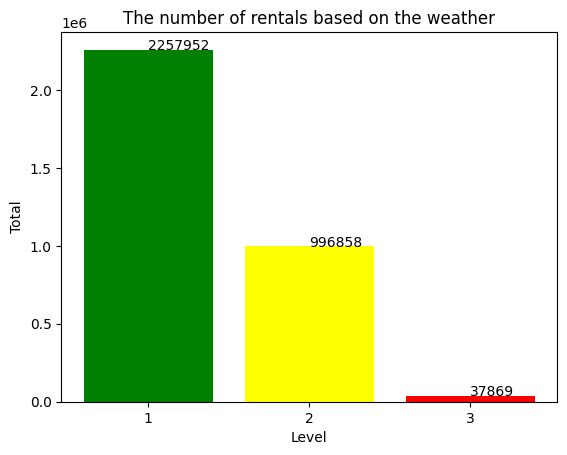

In [25]:
Level=['1','2','3']
total= [2257952,996858,37869]
colors=['green','yellow','red']
plt.bar(Level, total,color = colors)
plt.xlabel("Level")
plt.ylabel("Total")
for index, data in enumerate (total):
    plt.text (x=index, y=data+29, s=f'{data}')

plt.title("The number of rentals based on the weather")

plt.show()

Penjelasan :
kondisi cuaca dibedakan menjadi 4 level yang diantaranya:

- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
- 4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut

Berdasarkan data yang diperoleh, dampak kondisi cuaca terhadap penyewaan sepeda sangat mempengaruhi pemesanan yang ada. Terjadi banyak penurunan ketika kondisi cuaca masuk kedalam kategori 2 yang mana menurun menjadi 996858 dan menurun lagi ketika masuk kategori 3 yang hanya sebesar 37869. Berdasarkan data yang ada juga diketahui penyewaan dihentikan ketika masuk kategori keempat ketika cuaca sudah menjadi sangat ekstrim.

<function matplotlib.pyplot.show(close=None, block=None)>

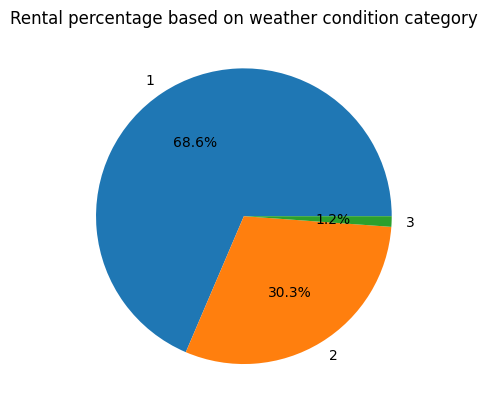

In [26]:
level = [2257952,996858,37869]
nomor =[1,2,3]
plt.pie(level, labels=nomor, autopct = '%2.1f%%')
plt.title("Rental percentage based on weather condition category")

plt.show

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

Pertanyaan 1 :penyewaan tertinggi dilakukan di musim gugur yang relativ lebih hangat, berbanding terbalik ketika memasuki musim semi yang mana penyewaan menjadi yang terendah dibandingkan ketiga musim lainnya. Disisi lain penyewaan didominasi oleh penyewa yang terdaftar daripada penyewa kasual

Pertanyaan 2 :Aktivitas penyewaan sepeda sangat dipengaruhi kondisi cuaca dalam keempat musim. ketika cuaca memburuk terjadi penurunan yang signifikan sehingga ketika cuaca ekstrim melanda menjadikan aktivitas penyewaan menjadi sama sekali tidak memungkinan. Oleh karenanya diperlukan persiapan yang tepat berdasarkan prediksi yang ada, ketika menghadapi perubahan cuaca yang tiba tiba.